# First assignment

# First task
Scan five arbitrary 128x128 pixel color imgaes in Python/LUA, display and print the contents of arrays (matrices, tensors) of RGB channels.

I use the imread() method from the imageio library to scan the images.

In [49]:
from imageio import imread
import numpy as np
from sklearn.preprocessing import scale


imread() returns with a (now) 3D numpy array containing the relevant data for each pixel.

In [50]:
images = [imread("128_0{}.png".format(str(index))) for index in range(1, 6)]

I change the arrays axis-orderings and reshape the data structure, so I get the R,G,B channels in 3 separate 1D array.

In [51]:
for image in images:
    RGB_image = image.transpose(2, 0, 1).reshape(4, -1)
    R = RGB_image[0]
    print(R)
    G = RGB_image[1]
    print(G)
    B = RGB_image[2]
    print(B)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Second task
For each channel, calculate the mean and standard deviation of each pixel for the five images, and then convert them to a data set with an expected value of 0 and a standard deviation of 1. Then check the expected value and standard deviation of the resulting data set.

I calculate and print the mean and standard deviation of each channels corresponding data set.

In [52]:
    # for image in images continued
    R_mean, R_std = np.mean(R), np.std(R)
    print("Red mean, standard deviation before scaling: {}, {}".format(R_mean, R_std))
    G_mean, G_std = np.mean(G), np.std(G)
    print("Green mean, standard deviation before scaling: {}, {}".format(G_mean, G_std))
    B_mean, B_std = np.mean(B), np.std(B)
    print("Blue mean, standard deviation before scaling: {}, {}".format(B_mean, B_std))


Red mean, standard deviation before scaling: 71.8297119140625, 94.06833158321987
Green mean, standard deviation before scaling: 68.906494140625, 73.02029377202409
Blue mean, standard deviation before scaling: 57.802978515625, 84.11686425134978


 Using scikit-learns (sklearn) scale() method I standardize the channels to get a data set with zero mean and unit variance. The latter is standard deviation squared, the square root of 1 is 1, so standard deviation and variance must be equal in this context, I get the right results.


In [53]:
    # for image in images continued
    Rs = scale(R)
    Gs = scale(G)
    Bs = scale(B)


Now I calculate and print the mean and standard deviation of the standardized channels.

In [54]:
    # for image in images
    Rs_mean, Rs_std = np.mean(Rs), np.std(Rs)
    print("Red mean, standard deviation after scaling: {}, {}".format(Rs_mean, Rs_std))
    Gs_mean, Gs_std = np.mean(Gs), np.std(Gs)
    print("Green mean, standard deviation after scaling: {}, {}".format(Gs_mean, Gs_std))
    Bs_mean, Bs_std = np.mean(Bs), np.std(Bs)
    print("Blue mean, standard deviation after scaling: {}, {}".format(Bs_mean, Bs_std))

Red mean, standard deviation after scaling: -2.7755575615628914e-17, 0.9999999999999999
Green mean, standard deviation after scaling: 2.7755575615628914e-17, 1.0
Blue mean, standard deviation after scaling: 1.3877787807814457e-17, 1.0


# Third task
Scan an arbitrary sound file in Python/LUA and display its spectrogram.

I use the soundfile (sf) library for scanning the soundfile and scipy and matplotlib to calculate and display the spectrogram.


In [55]:
import soundfile as sf
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

Since I use a stereo .flac file and calculating a spectrogram requires only one channel I use the first channel from the scanned audiofile.

In [56]:
frames, sampling_rate = sf.read("himnusz-b-dur.flac")
first_channel = frames[:, 0]

Using the first_channel and the sampling rate from the scanning I calculate the spectrogram of the channel using the spectrogram() scipy method.

In [57]:
freq, time, spect = spectrogram(first_channel, sampling_rate)

To display the calculated spectrogram I use the plt.pcolormesh() method with the data set scaled to dB scale (since the 10 * np.log10(spect)).

<ipython-input-58-7f4583afe509>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, freq, 10*np.log10(spect))


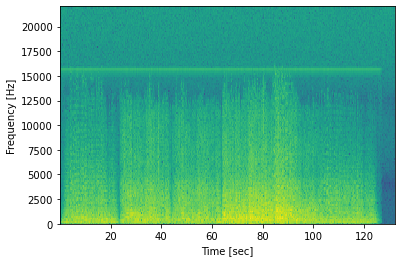

In [58]:
plt.pcolormesh(time, freq, 10*np.log10(spect))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


# Fourth task
From the Python/LUA script, download the textual content of https://en.wikipedia.org/wiki/Deep_learning, display the textual content, and display the frequency of the letters in the content in a histogram.

For this task I use the wikipediaapi library, which gives a simple mean to download entire wiki pages.
Secondly I use the Counter data structure from collections to calculate the frequency of the letters.

In [59]:
import wikipediaapi as wiki
from collections import Counter

en_wiki = wiki.Wikipedia('en')
page = en_wiki.page("Deep Learning")
text = page.text
print(text)

Deep learning  (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains.  Specifically, neural networks tend to be static a

After I printed the entire textual content of the page I preparate my data set to display the required histogram. To achieve this I eliminate all non-alphabetic characters from the text, then I create the Counter data structure with the alphabetically sorted and lowercase-converted content and create a histogram using the plt.bar() method.

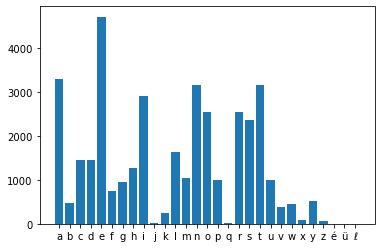

In [60]:
text = ''.join([char for char in text if char.isalpha()])
c = Counter(sorted(text.lower()))
plt.bar(c.keys(), c.values())
plt.show()